In [19]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [21]:
from matplotlib import rc

rc('font', family='NanumGothic')

C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
loc_gpd = gpd.read_file('2020빅콘테스트 문제데이터(혁신아이디어분야)/01_유동인구데이터(SK텔레콤)/4개지역_행정동.SHP', encoding='euckr')
loc_gpd.head()

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry
0,2020,2726067000,고산1동,27,대구광역시,27260,수성구,8881312.38,17757.54,128.69963062806,35.8117467030855,"POLYGON ((1110163.050 1760631.159, 1110159.980..."
1,2020,2726068000,고산2동,27,대구광역시,27260,수성구,24523329.28,25763.81,128.677147073408,35.838758403345,"POLYGON ((1108750.463 1760472.331, 1108750.254..."
2,2020,2726069000,고산3동,27,대구광역시,27260,수성구,5315712.45,11274.68,128.714043831276,35.8490479398919,"POLYGON ((1110796.393 1761790.272, 1110768.063..."
3,2020,2726064000,두산동,27,대구광역시,27260,수성구,1966650.15,7777.10,128.620832776346,35.8285656536299,"POLYGON ((1101901.259 1759682.396, 1101895.505..."
4,2020,2726055000,만촌1동,27,대구광역시,27260,수성구,2830625.94,8778.85,128.649513200936,35.8706818518603,"POLYGON ((1104959.292 1764030.763, 1104950.336..."


In [15]:
loc_gpd['SIDO_SGNG_NM'] = loc_gpd['SIDO_NM'].values + ' ' + loc_gpd['SGNG_NM'].values
loc_list = sorted(list(set(loc_gpd['SIDO_SGNG_NM'])))
print(loc_list)

['대구광역시 수성구', '대구광역시 중구', '서울특별시 노원구', '서울특별시 중구']


In [27]:
result_df = pd.read_pickle('2020빅콘테스트 문제데이터(혁신아이디어분야)/01_유동인구데이터(SK텔레콤)/features_flow_time_df.pkl')

C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
flow_loc_gpd = pd.merge(loc_gpd, result_df, right_on='dong_name', left_on='HDONG_NM')

C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
def drawLocGroup(locName, df, column, color_range=0.1):
    sample = df[loc_gpd.SIDO_SGNG_NM == locName]

    sample.geometry = sample.buffer(0.001)
    sample = sample.dissolve(by='HDONG_CD')
    ax = sample.plot(figsize=(10, 10), column=column, vmin=-color_range, vmax=color_range,
                     cmap="RdBu_r", edgecolor="k", legend=True)
    ax.set_title(locName + ": 동별 구역도")
    ax.set_axis_off()
    plt.show()

C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


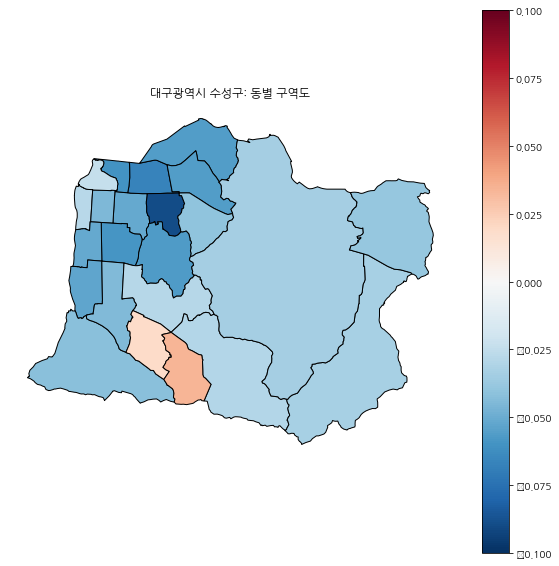

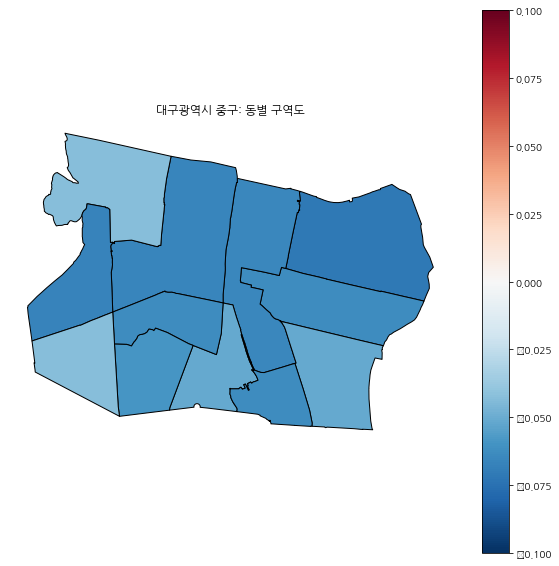

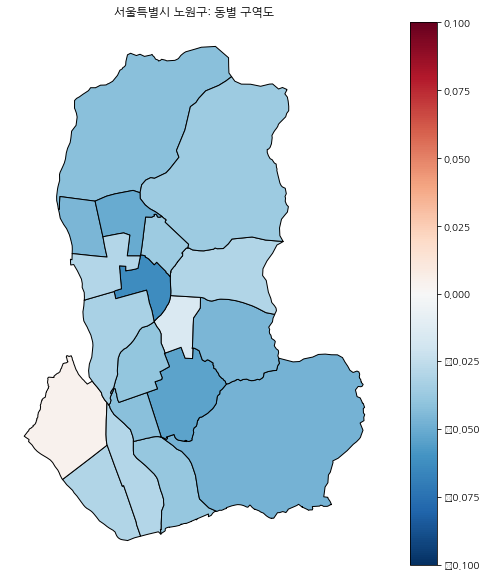

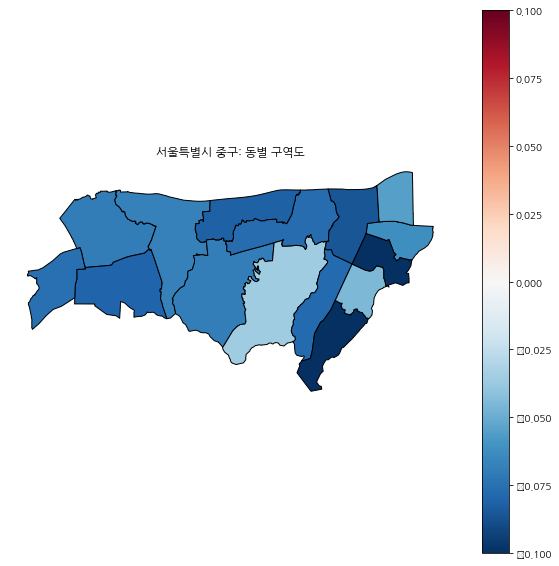

In [44]:
warnings.filterwarnings(action='ignore') 

for loc in loc_list:
    drawLocGroup(loc, flow_loc_gpd, 'confirmed_coef')
    
warnings.filterwarnings(action='default')

In [39]:
result_df = pd.read_pickle('2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/features_card.pkl')

C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
card_loc_gpd = pd.merge(loc_gpd, result_df, right_on='dong_name', left_on='HDONG_NM')

C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


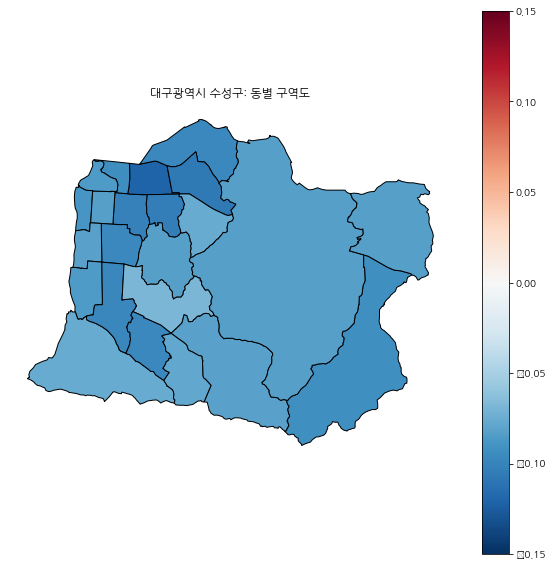

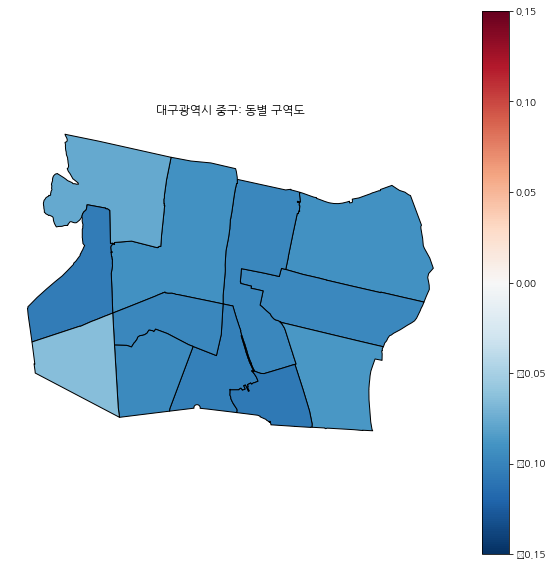

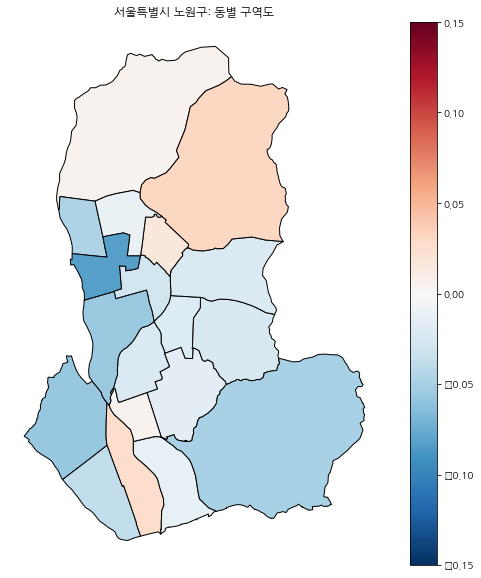

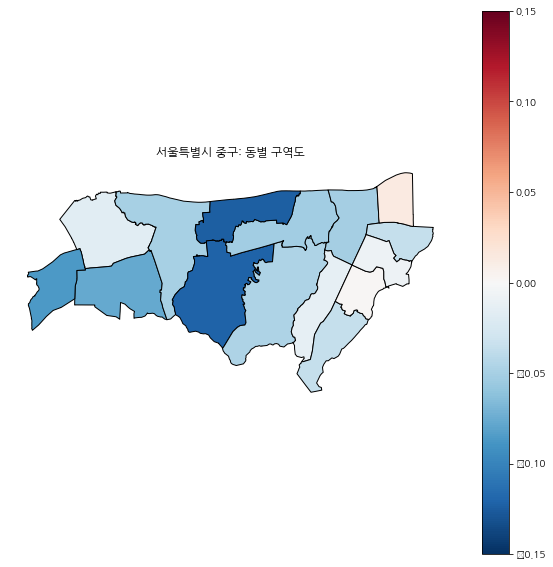

In [51]:
warnings.filterwarnings(action='ignore') 

for loc in loc_list:
    drawLocGroup(loc, card_loc_gpd, '요식업소_confirmed_coef', 0.15)
    
warnings.filterwarnings(action='default')

In [53]:
result_df = pd.read_pickle('2020빅콘테스트 문제데이터(혁신아이디어분야)/05_물류데이터(CJ올리브네트웍스)/features_delivery.pkl')

C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
delivery_loc_gpd = pd.merge(loc_gpd, result_df, right_on='dong_name', left_on='HDONG_NM')

C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\eyshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


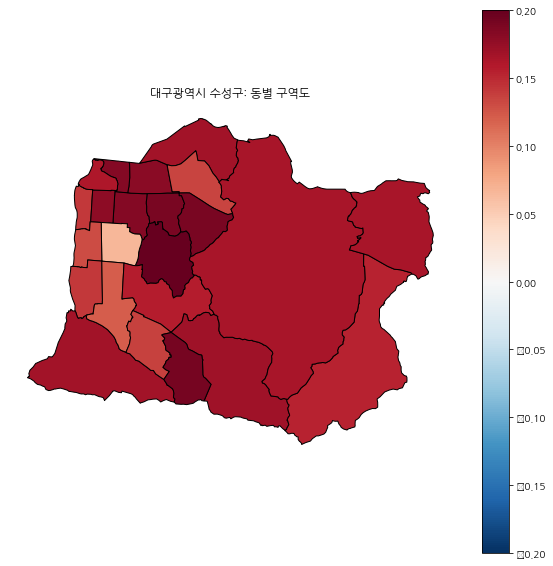

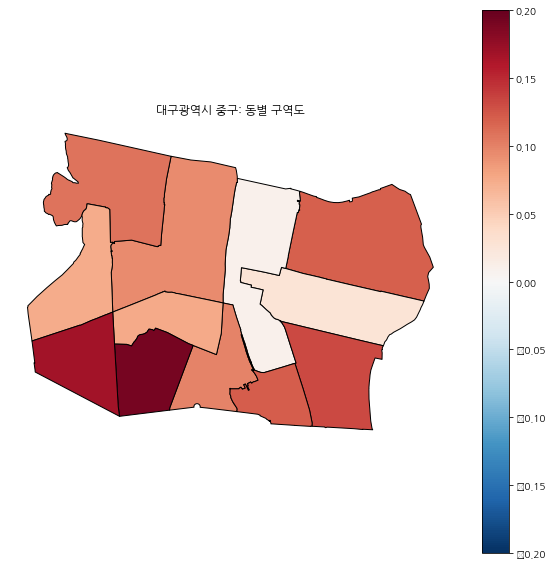

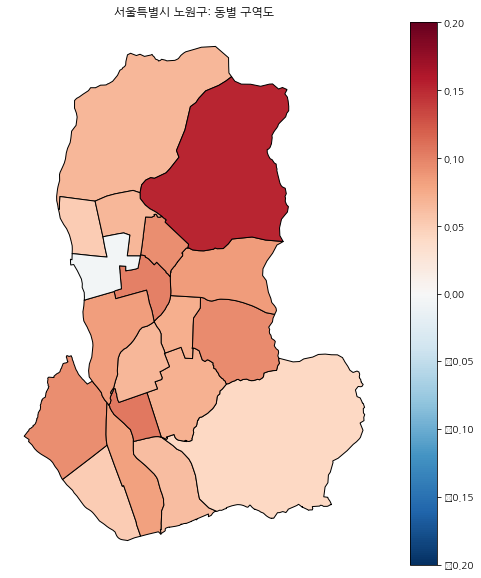

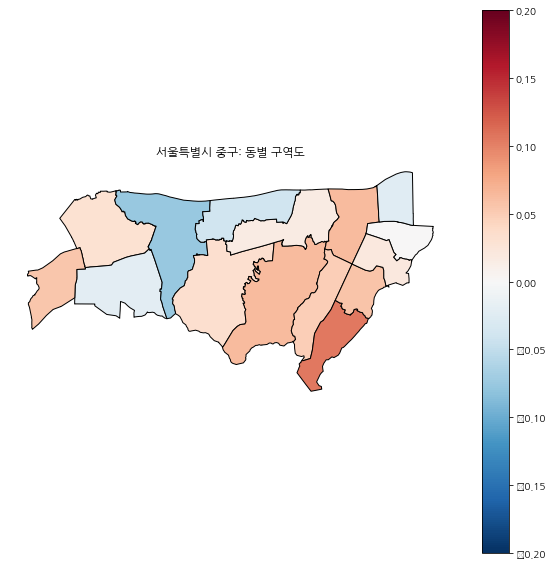

In [56]:
warnings.filterwarnings(action='ignore') 

for loc in loc_list:
    drawLocGroup(loc, delivery_loc_gpd, '요식업소_confirmed_coef', 0.2)
    
warnings.filterwarnings(action='default')